In [11]:
import numpy as np
import matplotlib.pyplot as plt

## MAKING L LAYER NN

In [12]:
def initialize_parameters(dims):
    
    np.random.seed(2)  #to ensure same weights everytime
    
    parameters = {}
    L = len(dims) - 1
    for l in range(L):
        parameters["W" + str(l+1)] = np.random.randn(dims[l+1], dims[l]) * np.sqrt(2 / dims[l]) #He initialization of weights
        parameters["b" + str(l+1)] = np.zeros((dims[l+1], 1))
        
    return parameters

In [13]:
def softmax(z):    #for multi-class classification
    t = np.exp(z)
    k = t.sum(axis = 0)
    return t / k
    
def sigmoid(z):    #for binary classification
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0 , z)

In [14]:
def forward_propagation(X, parameters):
    
    values = {}
    L = len(parameters)//2
    values["A0"] = X
    for l in range(L - 1):
        values["Z" + str(l+1)] = np.dot(parameters["W" + str(l+1)], values["A" + str(l)]) + parameters["b" + str(l+1)]
        values["A" + str(l+1)] = relu(values["Z" + str(l+1)])
    
    values["Z" + str(L)] = np.dot(parameters["W" + str(L)], values["A" + str(L-1)]) + parameters["b" + str(L)]
    values["A" + str(L)] = sigmoid(values["Z" + str(L)])   # can be changed to softmax
    
    return values

In [15]:
def get_cost(AL, Y):
    return ((- 1 * (Y * np.log(AL))).sum(axis = 0)).mean()

In [16]:
def back_propagation(Y, values, parameters):
    
    m = Y.shape[0]
    grads = {}
    temps = {}
    L = len(parameters)//2
    temps["dZ" + str(L)] = values["A" + str(L)] - Y
    grads["dW" + str(L)] = (1 / m) * np.dot(temps["dZ" + str(L)], values["A" + str(L-1)].T)
    grads["db" + str(L)] = (1 / m) * temps["dZ" + str(L)].sum(axis = 1, keepdims = True)
    
    for l in range(L - 1, 0, -1):
        temps["dZ" + str(l)] = np.dot(parameters["W" + str(l+1)].T, temps["dZ" + str(l+1)]) * np.int64(values["A" + str(l)] > 0)
        grads["dW" + str(l)] = (1 / m) * np.dot(temps["dZ" + str(l)], values["A" + str(l-1)].T)
        grads["db" + str(l)] = (1 / m) * temps["dZ" + str(l)].sum(axis = 1, keepdims = True)
    
    return grads

In [17]:
def model(x_train, y_train, x_test, y_test, alpha, num_iterations, dims):
    
    costs = []
    iterations = []
    parameters = initialize_parameters(dims)
    L = len(parameters)//2
    
    for i in range(num_iterations):
        
        values = forward_propagation(x_train, parameters)
        AL = values["A" + str(L)]
        
        cost = get_cost(AL, y_train)
        if(i % 100 == 0):
            if(i % 1000 == 0):
                print("cost after %i iterations is = %f" %(i, cost))
            costs.append(cost)
            iterations.append(i)
            
        grads = back_propagation(y_train, values, parameters)
        for l in range(L):
            parameters["W" + str(l+1)] -= alpha * grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] -= alpha * grads["db" + str(l+1)]
    
    plt.plot(iterations,costs)
    plt.show()
    
    predictions_test = forward_propagation(x_test, parameters)
    predictions_train = forward_propagation(x_train, parameters)
    return predictions_train["A" + str(L)], predictions_test["A" + str(L)]

## IMPLEMENTING THIS NETWORK ON BREAST CANCER DATASET

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [19]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = tts(x, y, random_state = 0)
x_train = x_train
x_test = x_test
y_train = y_train.T
y_test = y_test.T

ss = StandardScaler()
x_train = ss.fit_transform(x_train).T
x_test = ss.transform(x_test).T

cost after 0 iterations is = 0.543099
cost after 1000 iterations is = 0.042862
cost after 2000 iterations is = 0.027329
cost after 3000 iterations is = 0.021212
cost after 4000 iterations is = 0.017307
cost after 5000 iterations is = 0.014863
cost after 6000 iterations is = 0.013156
cost after 7000 iterations is = 0.011901
cost after 8000 iterations is = 0.010888
cost after 9000 iterations is = 0.009919
cost after 10000 iterations is = 0.009163
cost after 11000 iterations is = 0.008415
cost after 12000 iterations is = 0.007868
cost after 13000 iterations is = 0.007388
cost after 14000 iterations is = 0.006941
cost after 15000 iterations is = 0.006528
cost after 16000 iterations is = 0.006159
cost after 17000 iterations is = 0.005790
cost after 18000 iterations is = 0.005437
cost after 19000 iterations is = 0.005108
cost after 20000 iterations is = 0.004801
cost after 21000 iterations is = 0.004494
cost after 22000 iterations is = 0.004204
cost after 23000 iterations is = 0.003928
cost 

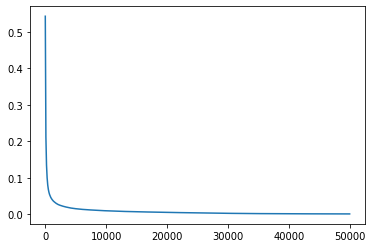

In [20]:
dims = [x_train.shape[0], 15, 10, 1]
pred_train, pred_test  = model(x_train, y_train, x_test, y_test, 0.0085, 50000, dims)

In [24]:
pred_test = np.int64(pred_test > 0.5)
acc_test = np.equal(pred_test, y_test).sum() / y_test.shape[0]
pred_train = np.int64(pred_train > 0.5)
acc_train = np.equal(pred_train, y_train).sum() / y_train.shape[0]

print('Training Accuracy : ', acc_train)
print('Testing Accuracy : ', acc_test)

Training Accuracy :  1.0
Testing Accuracy :  0.9790209790209791
